Провести графический и корреляционный анализ данных.
Построить регрессионную модель.


1. построить графики зависимости целевой переменной от остальных, выявить зависимости.
2. Посмотреть корреляцию между переменными
3. Рассмотреть линейную, полиномиальную и кусочно-постоянную модели


4. Использовать стандартную процедуру с разбиением на train, test с кросс-валидацией (https://scikit-learn.org/stable/modules/cross_validation.html)


baseline R2=0.93 (r2_score ) --- для лучшей модели

In [628]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [629]:
df = pd.read_csv("lab01.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)

In [630]:
df.head()

,x1,x2,x3,x4,x5,target
0,осень,6.0,10.0,684.853714,489.727534,127000.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0


In [631]:
pd.Categorical(df['x1']).describe()

,counts,freqs
categories,,
весна,253,0.253
зима,252,0.252
лето,254,0.254
осень,241,0.241


In [632]:
pd.Categorical(df['x2']).describe()

,counts,freqs
categories,,
5.0,105,0.105
6.0,190,0.190
7.0,225,0.225
8.0,184,0.184
9.0,197,0.197
10.0,99,0.099


In [633]:
pd.Categorical(df['x3']).describe()

,counts,freqs
categories,,
5.0,92,0.092
6.0,214,0.214
7.0,197,0.197
8.0,202,0.202
9.0,190,0.190
10.0,105,0.105


<AxesSubplot:>

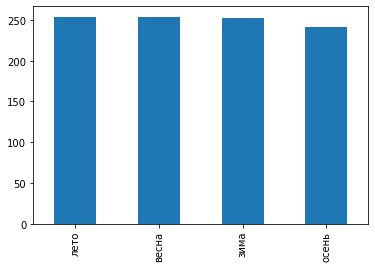

In [634]:
df['x1'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>],
       [<AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

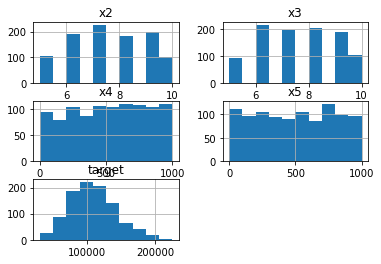

In [635]:
df.hist()

In [636]:
#for col in df.columns:
#    print(col, pd.unique(df[col]))

In [637]:
est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
x4_binned = est.fit_transform(df[['x4']])
x5_binned = est.fit_transform(df[['x5']])
df['x4_binned'] = x4_binned
df['x5_binned'] = x5_binned

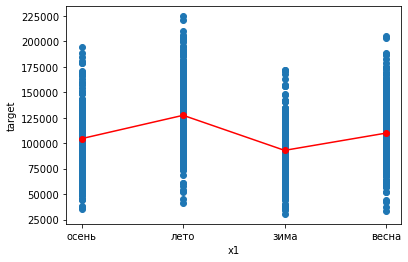

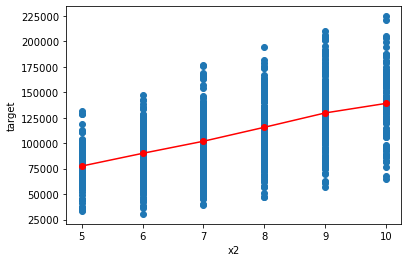

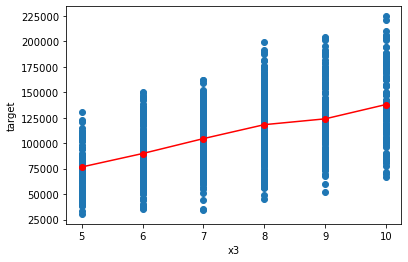

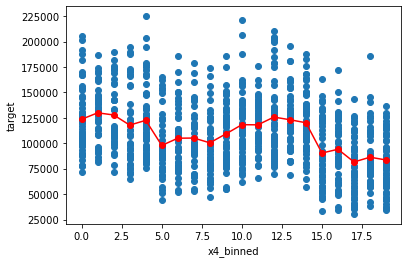

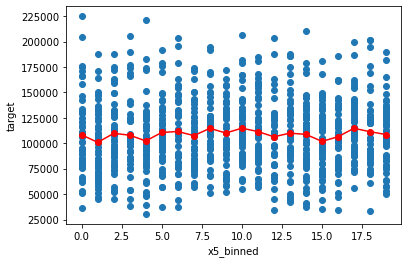

In [638]:
for col in ["x1", "x2", "x3", 'x4_binned', 'x5_binned']:
    dfgr = df.groupby(col).mean().reset_index()
    plt.plot(df[col], df.target, "o")
    plt.plot(dfgr[col], dfgr.target, "ro-")
    plt.xlabel(col)
    plt.ylabel("target")
    plt.show()

In [639]:
df.corr()

,x2,x3,x4,x5,target,x4_binned,x5_binned
x2,1.000000,-0.031210,0.030458,0.047308,0.556719,0.029810,0.046893
x3,-0.031210,1.000000,0.040714,0.001254,0.522521,0.041928,0.000169
x4,0.030458,0.040714,1.000000,0.010863,-0.297098,0.998735,0.011620
x5,0.047308,0.001254,0.010863,1.000000,0.027597,0.011012,0.998745
target,0.556719,0.522521,-0.297098,0.027597,1.000000,-0.296822,0.026699
x4_binned,0.029810,0.041928,0.998735,0.011012,-0.296822,1.000000,0.011645
x5_binned,0.046893,0.000169,0.011620,0.998745,0.026699,0.011645,1.000000


In [640]:
le = preprocessing.LabelEncoder()
df['x1_label'] = le.fit_transform(df['x1'])
df

,x1,x2,x3,x4,x5,target,x4_binned,x5_binned,x1_label
0,осень,6.0,10.0,684.853714,489.727534,127000.0,13.0,9.0,3
1,лето,6.0,5.0,787.439842,129.226659,54200.0,15.0,2.0,2
2,лето,7.0,8.0,934.334854,996.189811,107600.0,18.0,19.0,2
3,зима,7.0,7.0,507.949612,553.560324,91800.0,10.0,11.0,1
4,зима,10.0,10.0,154.831480,88.940079,171500.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0,16.0,0.0,3
996,осень,7.0,6.0,842.487798,164.747387,53800.0,16.0,3.0,3
997,осень,10.0,7.0,497.651151,639.352422,122800.0,9.0,12.0,3
998,осень,8.0,6.0,282.684179,194.777096,84400.0,5.0,3.0,3


# Linear Regression

In [641]:
colX = ['x1_label', 'x2', 'x3', 'x4', 'x5']
X = df[colX]
df[colX]

,x1_label,x2,x3,x4,x5
0,3,6.0,10.0,684.853714,489.727534
1,2,6.0,5.0,787.439842,129.226659
2,2,7.0,8.0,934.334854,996.189811
3,1,7.0,7.0,507.949612,553.560324
4,1,10.0,10.0,154.831480,88.940079
...,...,...,...,...,...
995,3,8.0,5.0,827.094070,4.385557
996,3,7.0,6.0,842.487798,164.747387
997,3,10.0,7.0,497.651151,639.352422
998,3,8.0,6.0,282.684179,194.777096


In [642]:
X, y = df[colX], df['target']

In [643]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
reg1.score(X_test, y_test)

0.7358157592917782

Cross Validation

In [644]:
kf = KFold(n_splits=5, shuffle=True, random_state=2)
kf

KFold(n_splits=5, random_state=2, shuffle=True)

In [645]:
for train_index, test_index in kf.split(X_train):
    X_tr, X_val = X.loc[train_index,:], X.loc[test_index,:]
    y_tr, y_val = y.loc[train_index], y.loc[test_index]
    reg1.fit(X_tr, y_tr)
    print(reg1.score(X_tr, y_tr),reg1.score(X_val, y_val))

0.6980816421663147 0.7903679757071712
0.7396051311880705 0.6140395590044769
0.715612554214837 0.7238667551489253
0.7217413226597044 0.7087399480255437
0.725900925901487 0.6907165326608782


# Polynomial

In [646]:
pf = PolynomialFeatures(degree = 3, include_bias=False)
X_poly = pd.DataFrame(pf.fit_transform(X))

In [647]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [648]:
reg1.fit(X_poly_train, y_poly_train)
reg1.score(X_poly_test, y_poly_test)

0.8974417745554587

In [649]:
for train_index, test_index in kf.split(X_poly_train):
    X_poly_tr, X_poly_val = X_poly.loc[train_index,:], X_poly.loc[test_index,:]
    y_poly_tr, y_poly_val = y.loc[train_index], y.loc[test_index]
    reg1.fit(X_poly_tr, y_poly_tr)
    print(reg1.score(X_poly_tr, y_poly_tr),reg1.score(X_poly_val, y_poly_val))

0.9023530566109587 0.9019177000903497
0.9098991755529288 0.8597029641673927
0.9044952022550777 0.8913008090836441
0.9054668112403408 0.8816482529916008
0.9088707098342538 0.8697417651406048


# Split

In [650]:
ohe = preprocessing.OneHotEncoder()
x1_ = ohe.fit_transform(df[['x1']]).toarray()
x2_ = ohe.fit_transform(df[['x2']]).toarray()
x3_ = ohe.fit_transform(df[['x3']]).toarray()
df = pd.concat([df, pd.DataFrame(x1_, columns=['x1_' + str(i) for i in range(4)])], axis=1)
df = pd.concat([df, pd.DataFrame(x2_, columns=['x2_' + str(i) for i in range(6)])], axis=1)
df = pd.concat([df, pd.DataFrame(x3_, columns=['x3_' + str(i) for i in range(6)])], axis=1)
df

,x1,x2,x3,x4,x5,target,x4_binned,x5_binned,x1_label,x1_0,...,x2_2,x2_3,x2_4,x2_5,x3_0,x3_1,x3_2,x3_3,x3_4,x3_5
0,осень,6.0,10.0,684.853714,489.727534,127000.0,13.0,9.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0,15.0,2.0,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0,18.0,19.0,2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0,10.0,11.0,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0,3.0,1.0,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0,16.0,0.0,3,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,осень,7.0,6.0,842.487798,164.747387,53800.0,16.0,3.0,3,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997,осень,10.0,7.0,497.651151,639.352422,122800.0,9.0,12.0,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,осень,8.0,6.0,282.684179,194.777096,84400.0,5.0,3.0,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [651]:
est_oh = KBinsDiscretizer(n_bins=20, encode='onehot-dense', strategy='uniform')

In [652]:
x4_ = est_oh.fit_transform(df[['x4']])
x5_ = est_oh.fit_transform(df[['x5']])
df = pd.concat([df, pd.DataFrame(x4_, columns=['x4_' + str(i) for i in range(20)])], axis=1)
df = pd.concat([df, pd.DataFrame(x5_, columns=['x5_' + str(i) for i in range(20)])], axis=1)
df                

,x1,x2,x3,x4,x5,target,x4_binned,x5_binned,x1_label,x1_0,...,x5_10,x5_11,x5_12,x5_13,x5_14,x5_15,x5_16,x5_17,x5_18,x5_19
0,осень,6.0,10.0,684.853714,489.727534,127000.0,13.0,9.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0,15.0,2.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0,18.0,19.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0,10.0,11.0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0,3.0,1.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0,16.0,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,осень,7.0,6.0,842.487798,164.747387,53800.0,16.0,3.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,осень,10.0,7.0,497.651151,639.352422,122800.0,9.0,12.0,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,осень,8.0,6.0,282.684179,194.777096,84400.0,5.0,3.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [653]:
colX_spl = ['x1_' + str(i) for i in range(4)]+['x2_' + str(i) for i in range(6)]+['x3_' + str(i) for i in range(6)]+['x4_' + str(i) for i in range(20)]+['x5_' + str(i) for i in range(20)]

In [654]:
X_spl = df[colX_spl]
X_spl

,x1_0,x1_1,x1_2,x1_3,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,...,x5_10,x5_11,x5_12,x5_13,x5_14,x5_15,x5_16,x5_17,x5_18,x5_19
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [655]:
X_spl_train, X_spl_test, y_train, y_test = train_test_split(X_spl, y, test_size=0.33, random_state=42)

In [656]:
reg1.fit(X_spl_train, y_train)
reg1.score(X_spl_test, y_test)

0.9497978832152039

In [657]:
for train_index, test_index in kf.split(X_spl_train):
    X_spl_tr, X_spl_val = X_spl.loc[train_index,:], X_spl.loc[test_index,:]
    y_spl_tr, y_spl_val = y.loc[train_index], y.loc[test_index]
    reg1.fit(X_spl_tr, y_spl_tr)
    print(reg1.score(X_spl_tr, y_spl_tr),reg1.score(X_spl_val, y_spl_val))

0.955003156655266 0.9453535759057995
0.9580148518776266 0.927508381391526
0.9519203381233723 0.9599840505423882
0.956404230380922 0.9373913163761052
0.9543682986483382 0.9422575517901343
